# find contracts pages in collections of pages

## input data

The input CSV file is generated from content json files that are output of MinerU runs on the original pdf documents. The pdf documents contain several pages, including a few with the contract information we are looking for.

The CSV file contains the columns `docid`, `page`, `block`, `type`, and `content`. `docid` denotes the base filename of the original document, `page` is the page in the original document, `block` is the source block within the page (MinerU does layout reading, therefore partitioning a page in several 'blocks'). `type` can be either of 'text', 'table', or 'discarded': 'discarded' meaning that the block was decided by MinerU to not belong to the variable text on the page, but being part of e.g. constant headers and footers. Finally `content`, contains the text within the box, stripped of leading, trailing, and multiple spaces (one space left).

In [1]:
import pandas as pd
import numpy as np

In [2]:
dat = pd.read_csv("data.csv", keep_default_na=False)

In [3]:
dat

,docid,page,block,type,content
0,D-2020-00005018,0,1,text,Lantmateriet Fastighetsinskrivning SE76180Norr...
1,D-2020-00005018,0,2,text,Arendenr: D-2020-00005018 Inskrivningsdatum:...
2,D-2020-00005018,0,3,text,Enligt ansokan har foljande inskrivningsatgard...
3,D-2020-00005018,0,4,text,Avtalsservitut Kraftledning D-2020-00005018:1
4,D-2020-00005018,0,5,text,Om rattigheten upphor helt eller delvis ska ra...
...,...,...,...,...,...
1194,D-2022-00018136,15,208,discarded,VATTENFALL
1195,D-2022-00018136,15,209,discarded,2021-08-31
1196,D-2022-00018136,15,210,discarded,KOPIA
1197,D-2022-00018136,15,211,discarded,5730-6326


In [4]:
dat = dat[dat.type != "discarded"].copy()
dat

,docid,page,block,type,content
0,D-2020-00005018,0,1,text,Lantmateriet Fastighetsinskrivning SE76180Norr...
1,D-2020-00005018,0,2,text,Arendenr: D-2020-00005018 Inskrivningsdatum:...
2,D-2020-00005018,0,3,text,Enligt ansokan har foljande inskrivningsatgard...
3,D-2020-00005018,0,4,text,Avtalsservitut Kraftledning D-2020-00005018:1
4,D-2020-00005018,0,5,text,Om rattigheten upphor helt eller delvis ska ra...
...,...,...,...,...,...
1186,D-2022-00018136,15,200,text,Ers Godk av: Sofia Berg / Anders Eriksson VAT-...
1187,D-2022-00018136,15,201,text,Onskas ersittning insatt på eget konto:
1188,D-2022-00018136,15,202,text,Bank
1189,D-2022-00018136,15,203,text,Onskas ersäittning insatt pa eget Plus- eller ...


## define pages containing contract information

Done from visual inspection.

In [5]:
dat.loc[(dat["docid"] == "D-2020-00005018") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00040677") &
        (dat["page"].isin([1, 2])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00047813") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00150874") &
        (dat["page"].isin([0, 1, 2])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00213476") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00314079") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00400144") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00400146") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2020-00545991") &
        (dat["page"].isin([1, 2, 3])), "hit"] = True
dat.loc[(dat["docid"] == "D-2022-00018136") &
        (dat["page"].isin([2, 3, 4])), "hit"] = True

In [6]:
dat.loc[dat.hit != True, "hit"] = False

In [7]:
dat

,docid,page,block,type,content,hit
0,D-2020-00005018,0,1,text,Lantmateriet Fastighetsinskrivning SE76180Norr...,False
1,D-2020-00005018,0,2,text,Arendenr: D-2020-00005018 Inskrivningsdatum:...,False
2,D-2020-00005018,0,3,text,Enligt ansokan har foljande inskrivningsatgard...,False
3,D-2020-00005018,0,4,text,Avtalsservitut Kraftledning D-2020-00005018:1,False
4,D-2020-00005018,0,5,text,Om rattigheten upphor helt eller delvis ska ra...,False
...,...,...,...,...,...,...
1186,D-2022-00018136,15,200,text,Ers Godk av: Sofia Berg / Anders Eriksson VAT-...,False
1187,D-2022-00018136,15,201,text,Onskas ersittning insatt på eget konto:,False
1188,D-2022-00018136,15,202,text,Bank,False
1189,D-2022-00018136,15,203,text,Onskas ersäittning insatt pa eget Plus- eller ...,False


## aggregate content into one string per page

In [8]:
dat = dat.drop(["block", "type"], axis=1).groupby(["docid", "page"]).agg(
    {"content": lambda x: "".join(x),
     "hit": lambda x: sum(x) > 0
    }
)

In [9]:
dat

content    hit
docid           page                                                          
D-2020-00005018 0     Lantmateriet Fastighetsinskrivning SE76180Norr...  False
                1     Markupplatelseavtal avseende elektrisk starkst...   True
                2     Markabel a inomvgmre fensidvg forgs p sdant  a...   True
                3     Leninvelinaie skyldigheteridetta avtal.\ 8 Bor...   True
                4                                                        False
...                                                                 ...    ...
D-2022-00018136 11    Bolagsverket bildades den 1 juli 2004genomat d...  False
                12    FASTIGHET /SAMFALLIGHET SaMt PROJEKTINFORMATIO...  False
                13    Fastighetsagare (personnr/org.nr) Agd andelErs...  False
                14                                                       False
                15    Markagare: Andel: 1/1Ledning: VALBO-SALGSJON-L...  False

[85 rows x 2 columns]

## training and classification

In [10]:
X = dat.loc[:, "content"].values
y = dat.loc[:, "hit"].values

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(analyzer="word", ngram_range=(2, 6),
                     strip_accents="unicode", max_features=4500)
X = td.fit_transform(X).toarray()

In [12]:
td

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",'unicode'
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

In [17]:
accuracy_score(y_test, y_pred)

1.0

In [18]:
print(classification_report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00         8

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



## classical cross validation

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X, y)

array([1., 1., 1., 1., 1.])

## leave-one-out cross validation

In [20]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(classifier, X, y, cv=loo)
print(f"Number of cv iterations: {len(scores)}")
print(f"Mean accuracy: {scores.mean():.2f}")

Number of cv iterations: 85
Mean accuracy: 1.00


## finding top n-grams

In [21]:
feature_names = td.get_feature_names_out()

In [22]:
feature_names

array(['04 29dokumentet', '04 29dokumentet skapat2021',
       '04 29dokumentet skapat2021 08', ..., 'yta etc typ',
       'yta etc typ och', 'yta etc typ och markslagantalsumma'],
      shape=(4500,), dtype=object)

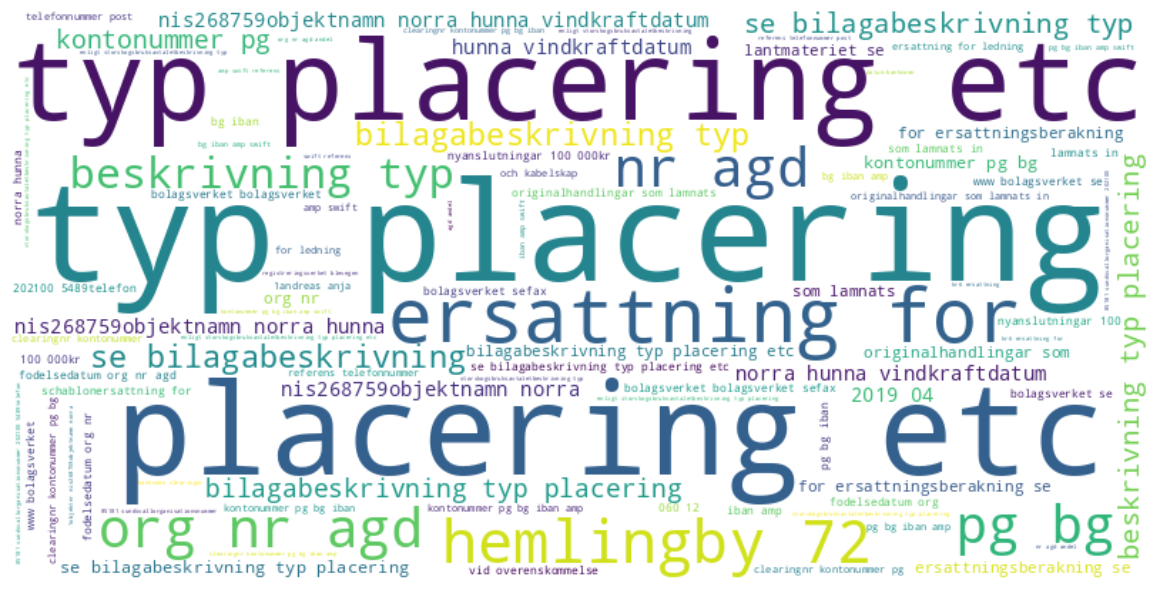

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get top n-grams with their scores
docs = X[y == False]
mean_tfidf = docs.mean(axis=0)
n = 100

top_indices = mean_tfidf.argsort()[-n:][::-1]
top_ngrams = feature_names[top_indices]
top_scores = mean_tfidf[top_indices]

# Clean n-grams by removing/replacing newlines and other problematic characters
ngram_freq = {}
for ngram, score in zip(top_ngrams, top_scores):
    # Replace newlines and other whitespace with spaces
    cleaned_ngram = ' '.join(ngram.split())
    ngram_freq[cleaned_ngram] = score

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      collocations=False).generate_from_frequencies(ngram_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
top_ngrams

array(['typ placering', 'placering etc', 'typ placering etc',
       'ersattning for', 'hemlingby 72', 'org nr agd', 'nr agd', 'pg bg',
       'beskrivning typ', 'se bilagabeskrivning', 'bilagabeskrivning typ',
       'se bilagabeskrivning typ', 'beskrivning typ placering',
       'bilagabeskrivning typ placering', 'kontonummer pg',
       'nis268759objektnamn norra hunna vindkraftdatum', '2019 04',
       'hunna vindkraftdatum', 'norra hunna vindkraftdatum',
       'nis268759objektnamn norra', 'nis268759objektnamn norra hunna',
       'se bilagabeskrivning typ placering', 'kontonummer pg bg',
       'bilagabeskrivning typ placering etc', 'org nr', 'som lamnats',
       'lantmateriet se', 'originalhandlingar som',
       'for ersattningsberakning se', 'for ersattningsberakning',
       'ersattningsberakning se',
       'se bilagabeskrivning typ placering etc', 'norra hunna',
       'schablonersattning for', 'originalhandlingar som lamnats',
       'www bolagsverket', 'www bolagsverket 

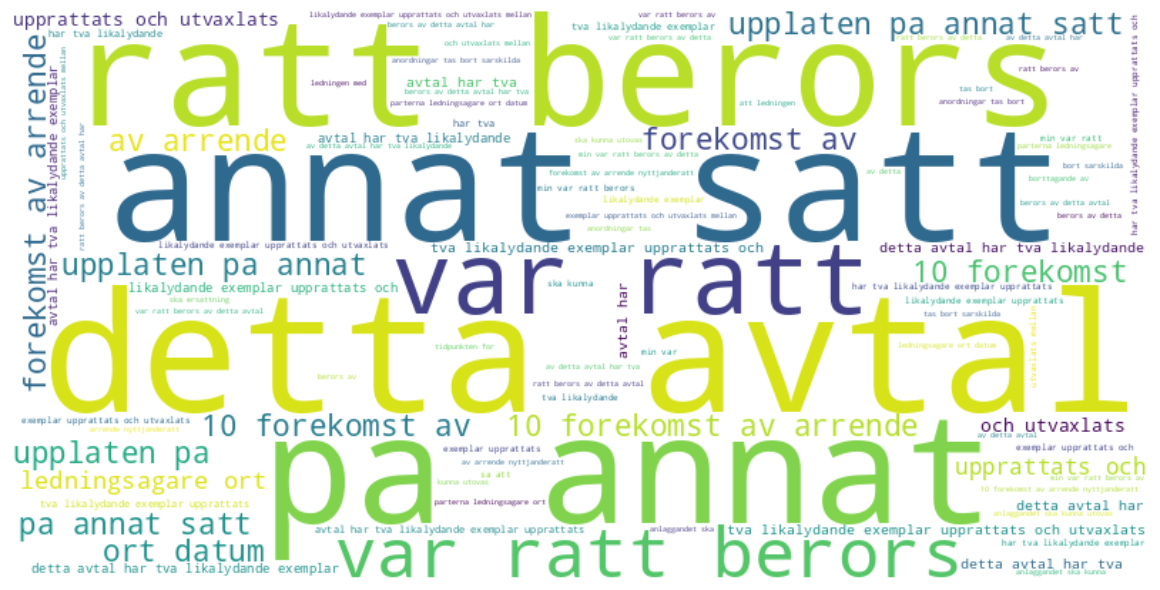

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get top n-grams with their scores
docs = X[y == True]
mean_tfidf = docs.mean(axis=0)
n = 100

top_indices = mean_tfidf.argsort()[-n:][::-1]
top_ngrams = feature_names[top_indices]
top_scores = mean_tfidf[top_indices]

# Clean n-grams by removing/replacing newlines and other problematic characters
ngram_freq = {}
for ngram, score in zip(top_ngrams, top_scores):
    # Replace newlines and other whitespace with spaces
    cleaned_ngram = ' '.join(ngram.split())
    ngram_freq[cleaned_ngram] = score

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      collocations=False).generate_from_frequencies(ngram_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
top_ngrams

array(['detta avtal', 'annat satt', 'pa annat', 'ratt berors', 'var ratt',
       'var ratt berors', 'upplaten pa annat satt', 'upplaten pa annat',
       'upplaten pa', 'pa annat satt', 'av arrende',
       '10 forekomst av arrende', '10 forekomst av',
       'forekomst av arrende', '10 forekomst', 'forekomst av',
       'ort datum', 'ledningsagare ort', 'upprattats och',
       'upprattats och utvaxlats', 'och utvaxlats',
       'tva likalydande exemplar upprattats och utvaxlats',
       'tva likalydande exemplar upprattats och', 'detta avtal har',
       'avtal har', 'avtal har tva', 'detta avtal har tva',
       'detta avtal har tva likalydande',
       'detta avtal har tva likalydande exemplar',
       'likalydande exemplar upprattats och', 'avtal har tva likalydande',
       'avtal har tva likalydande exemplar',
       'avtal har tva likalydande exemplar upprattats',
       'tva likalydande exemplar upprattats', 'tva likalydande exemplar',
       'har tva', 'har tva likalydande',